# Detect Lung Cancer using patient diagnosis data.

 # Objective
 Build a system that can predict the survival of a patient given details of the patient. Explore the
 data to understand the features and figure out an approach

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# step 1 Data Collection:

In [5]:

df=pd.read_csv('dataset_med.csv')
df.head(25)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
5,6,50.0,Male,Italy,2023-01-02,Stage I,No,Never Smoked,37.6,274,1,0,0,0,Radiation,2024-12-27,0
6,7,49.0,Female,Croatia,2018-05-21,Stage III,Yes,Passive Smoker,43.1,259,0,0,0,0,Radiation,2019-05-06,1
7,8,51.0,Male,Denmark,2017-02-18,Stage IV,Yes,Former Smoker,25.8,195,1,1,0,0,Combined,2017-08-26,0
8,9,64.0,Male,Sweden,2021-03-21,Stage III,Yes,Current Smoker,21.5,236,0,0,0,0,Chemotherapy,2022-03-07,0
9,10,56.0,Male,Hungary,2021-11-30,Stage IV,Yes,Current Smoker,17.3,183,1,0,0,1,Surgery,2023-11-29,0


# 1. Problem Statement
The goal of this system is to predict whether a patient will survive or not based on their medical details, demographics, and health records. This is a binary classification problem where the target variable (Survival) has two possible outcomes:

1 (Survived)
0 (Did not survive)

# This is a classification problem .

Why Classification?
The goal is to predict whether a patient will survive or not (Yes/No, 1/0).
The target variable is binary (two categories), making it a binary classification problem.

# step2 : Collect and Prepare the Data

In [8]:
df.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [9]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

In [10]:
df.country.unique()

array(['Sweden', 'Netherlands', 'Hungary', 'Belgium', 'Luxembourg',
       'Italy', 'Croatia', 'Denmark', 'Malta', 'Germany', 'Poland',
       'Ireland', 'Romania', 'Spain', 'Greece', 'Estonia', 'Cyprus',
       'France', 'Slovenia', 'Latvia', 'Portugal', 'Austria',
       'Czech Republic', 'Finland', 'Lithuania', 'Slovakia', 'Bulgaria'],
      dtype=object)

In [11]:
df.diagnosis_date.unique()

array(['2016-04-05', '2023-04-20', '2023-04-05', ..., '2017-12-27',
       '2021-04-22', '2020-04-02'], dtype=object)

In [12]:
df.cancer_stage.unique()

array(['Stage I', 'Stage III', 'Stage IV', 'Stage II'], dtype=object)

In [13]:
df.family_history.unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df.smoking_status.unique()

array(['Passive Smoker', 'Former Smoker', 'Never Smoked',
       'Current Smoker'], dtype=object)

In [15]:
df.treatment_type.unique()

array(['Chemotherapy', 'Surgery', 'Combined', 'Radiation'], dtype=object)

In [16]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

In [17]:
# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=["object"]).columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

print("Categorical Columns:", list(cat_cols))
print("Numerical Columns:", list(num_cols))

Categorical Columns: ['gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type', 'end_treatment_date']
Numerical Columns: ['id', 'age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'survived']


In [18]:
# Encoding
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
encoder=LabelEncoder()

for col in df[['gender','family_history']]:
    df[col]=encoder.fit_transform(df[col])

df.head() #'gender'male=1 femal= 0,'family_history' yes=1,no=0 change to binary

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,Sweden,2016-04-05,Stage I,1,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,0,Netherlands,2023-04-20,Stage III,1,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,0,Hungary,2023-04-05,Stage III,1,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,0,Belgium,2016-02-05,Stage I,0,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,1,Luxembourg,2023-11-29,Stage I,0,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [19]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,Sweden,2016-04-05,Stage I,1,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,0,Netherlands,2023-04-20,Stage III,1,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,0,Hungary,2023-04-05,Stage III,1,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,0,Belgium,2016-02-05,Stage I,0,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,1,Luxembourg,2023-11-29,Stage I,0,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [20]:
df.drop('id',axis=1,inplace=True)

In [21]:
df.head()

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64.0,1,Sweden,2016-04-05,Stage I,1,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,50.0,0,Netherlands,2023-04-20,Stage III,1,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,65.0,0,Hungary,2023-04-05,Stage III,1,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,51.0,0,Belgium,2016-02-05,Stage I,0,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,37.0,1,Luxembourg,2023-11-29,Stage I,0,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [22]:
stage_mapping={'Stage I':1,'Stage II':2,'Stage III':3,'Stage IV':4}
df['cancer_stage']=df['cancer_stage'].map(stage_mapping)

In [23]:
df.head()

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64.0,1,Sweden,2016-04-05,1,1,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,50.0,0,Netherlands,2023-04-20,3,1,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,65.0,0,Hungary,2023-04-05,3,1,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,51.0,0,Belgium,2016-02-05,1,0,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,37.0,1,Luxembourg,2023-11-29,1,0,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [24]:
smoking_mapping={'Never Smoked':0,'Passive Smoker':1,'Former Smoker':2,'Current Smoker':3}
df['smoking_status']=df['smoking_status'].map(smoking_mapping)

In [25]:
df.head()

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64.0,1,Sweden,2016-04-05,1,1,1,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,50.0,0,Netherlands,2023-04-20,3,1,1,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,65.0,0,Hungary,2023-04-05,3,1,2,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,51.0,0,Belgium,2016-02-05,1,0,1,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,37.0,1,Luxembourg,2023-11-29,1,0,1,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [26]:

df['diagnosis_date']=pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date']=pd.to_datetime(df['end_treatment_date'])

# Extract  Year from diagnosis_date, end_treatment_date

df['diagnosis_year']=df["diagnosis_date"].dt.year
df['end_treatment_year']=df['end_treatment_date'].dt.year

df.head()

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,diagnosis_year,end_treatment_year
0,64.0,1,Sweden,2016-04-05,1,1,1,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,2016,2017
1,50.0,0,Netherlands,2023-04-20,3,1,1,41.2,280,1,1,0,0,Surgery,2024-06-17,1,2023,2024
2,65.0,0,Hungary,2023-04-05,3,1,2,44.0,268,1,1,0,0,Combined,2024-04-09,0,2023,2024
3,51.0,0,Belgium,2016-02-05,1,0,1,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,2016,2017
4,37.0,1,Luxembourg,2023-11-29,1,0,1,19.7,178,0,0,0,0,Combined,2025-01-08,0,2023,2025


In [27]:
# droping diagnosis_date ,end_treatment_date 
df.drop(df[['diagnosis_date','end_treatment_date']],axis=1,inplace=True)
df.head()

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,diagnosis_year,end_treatment_year
0,64.0,1,Sweden,1,1,1,29.4,199,0,0,1,0,Chemotherapy,0,2016,2017
1,50.0,0,Netherlands,3,1,1,41.2,280,1,1,0,0,Surgery,1,2023,2024
2,65.0,0,Hungary,3,1,2,44.0,268,1,1,0,0,Combined,0,2023,2024
3,51.0,0,Belgium,1,0,1,43.0,241,1,1,0,0,Chemotherapy,0,2016,2017
4,37.0,1,Luxembourg,1,0,1,19.7,178,0,0,0,0,Combined,0,2023,2025


In [28]:
df.treatment_type.unique()

array(['Chemotherapy', 'Surgery', 'Combined', 'Radiation'], dtype=object)

In [29]:
df = pd.get_dummies(df, columns=["treatment_type"],drop_first=True,dtype=int)
df.head()


,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,diagnosis_year,end_treatment_year,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,64.0,1,Sweden,1,1,1,29.4,199,0,0,1,0,0,2016,2017,0,0,0
1,50.0,0,Netherlands,3,1,1,41.2,280,1,1,0,0,1,2023,2024,0,0,1
2,65.0,0,Hungary,3,1,2,44.0,268,1,1,0,0,0,2023,2024,1,0,0
3,51.0,0,Belgium,1,0,1,43.0,241,1,1,0,0,0,2016,2017,0,0,0
4,37.0,1,Luxembourg,1,0,1,19.7,178,0,0,0,0,0,2023,2025,1,0,0


In [30]:
df.drop('country',inplace=True,axis=1)

In [31]:
df.head()

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,diagnosis_year,end_treatment_year,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,64.0,1,1,1,1,29.4,199,0,0,1,0,0,2016,2017,0,0,0
1,50.0,0,3,1,1,41.2,280,1,1,0,0,1,2023,2024,0,0,1
2,65.0,0,3,1,2,44.0,268,1,1,0,0,0,2023,2024,1,0,0
3,51.0,0,1,0,1,43.0,241,1,1,0,0,0,2016,2017,0,0,0
4,37.0,1,1,0,1,19.7,178,0,0,0,0,0,2023,2025,1,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       890000 non-null  float64
 1   gender                    890000 non-null  int32  
 2   cancer_stage              890000 non-null  int64  
 3   family_history            890000 non-null  int32  
 4   smoking_status            890000 non-null  int64  
 5   bmi                       890000 non-null  float64
 6   cholesterol_level         890000 non-null  int64  
 7   hypertension              890000 non-null  int64  
 8   asthma                    890000 non-null  int64  
 9   cirrhosis                 890000 non-null  int64  
 10  other_cancer              890000 non-null  int64  
 11  survived                  890000 non-null  int64  
 12  diagnosis_year            890000 non-null  int32  
 13  end_treatment_year        890000 non-null  i

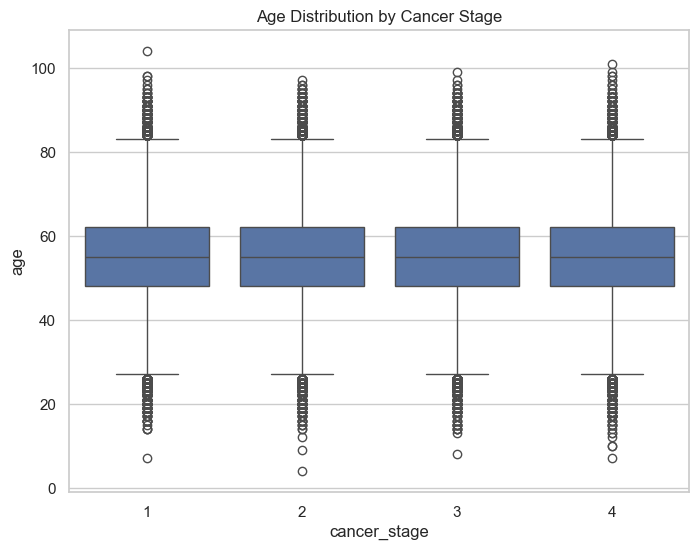

In [33]:
# Set plot style
sns.set(style="whitegrid")

# 1. Box Plot - Age Distribution by Cancer Stage
plt.figure(figsize=(8, 6))
sns.boxplot(x="cancer_stage", y="age", data=df)
plt.title("Age Distribution by Cancer Stage")
plt.show()

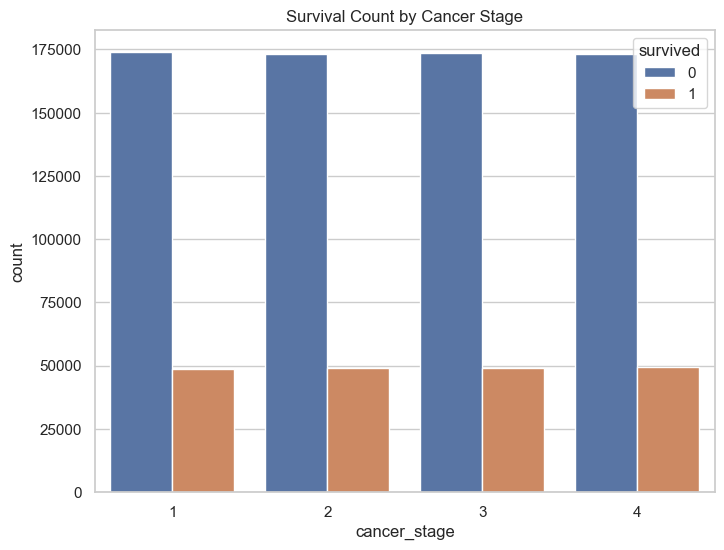

In [34]:
# 2. Count Plot - Survival Count by Cancer Stage
plt.figure(figsize=(8, 6))
sns.countplot(x="cancer_stage", hue="survived", data=df)
plt.title("Survival Count by Cancer Stage")
plt.show()

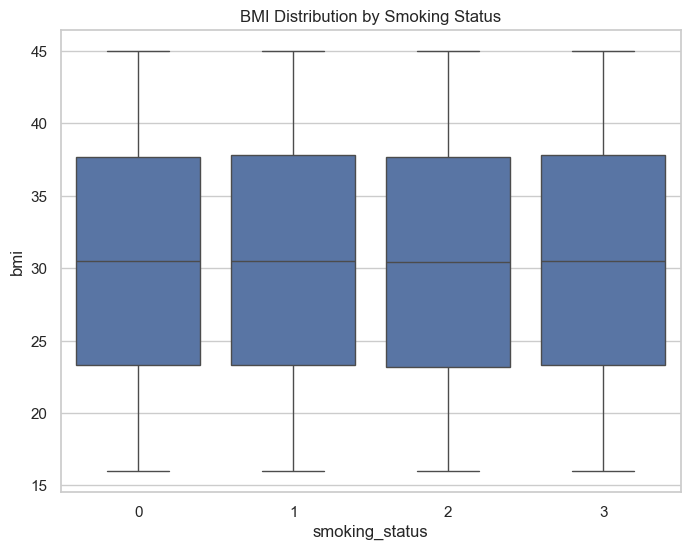

In [35]:
# 3. box Plot - BMI Distribution by Smoking Status
plt.figure(figsize=(8, 6))
sns.boxplot(x="smoking_status", y="bmi", data=df)

plt.title("BMI Distribution by Smoking Status")
plt.show()


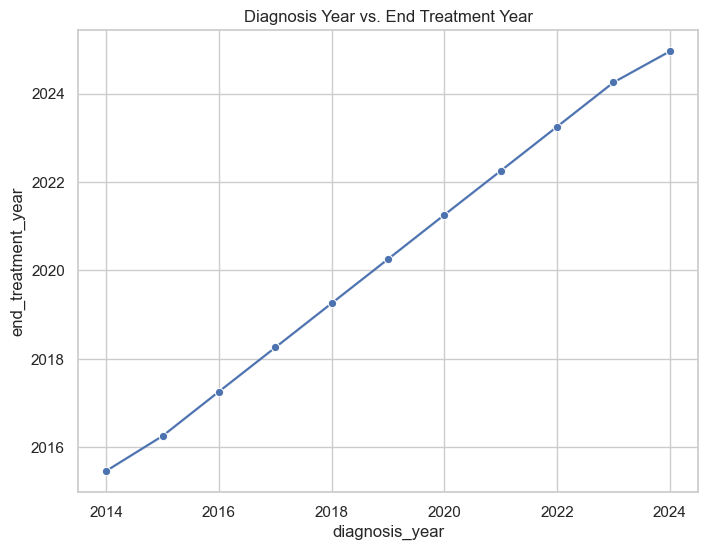

In [36]:
# 4. Line Chart - Diagnosis and End Treatment Trends
plt.figure(figsize=(8, 6))
sns.lineplot(x="diagnosis_year", y="end_treatment_year", data=df, marker="o")
plt.title("Diagnosis Year vs. End Treatment Year")
plt.show()

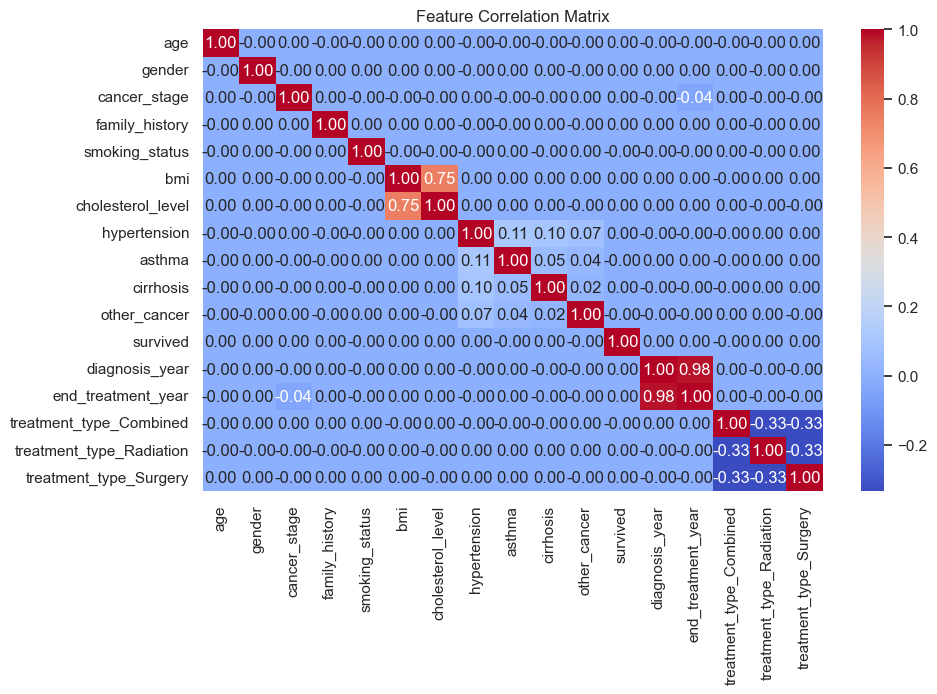

In [37]:
# 5. Heatmap - Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

<Figure size 2400x1200 with 0 Axes>

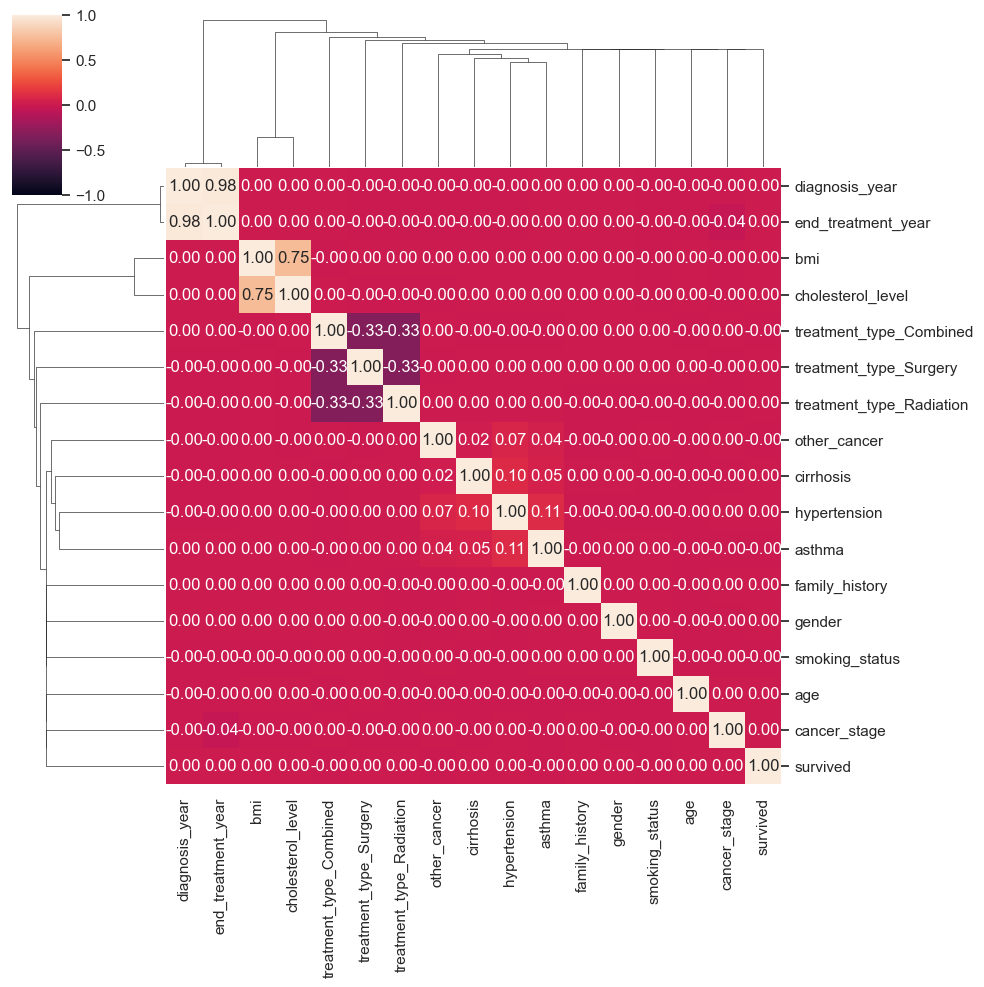

In [38]:
plt.figure(figsize=(24,12))
sns.clustermap(df.corr(),annot=True,vmin=-1,vmax=1,fmt=".2f")
plt.show()

In [46]:
df.head()

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,diagnosis_year,end_treatment_year,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,64.0,1,1,1,1,29.4,199,0,0,1,0,0,2016,2017,0,0,0
1,50.0,0,3,1,1,41.2,280,1,1,0,0,1,2023,2024,0,0,1
2,65.0,0,3,1,2,44.0,268,1,1,0,0,0,2023,2024,1,0,0
3,51.0,0,1,0,1,43.0,241,1,1,0,0,0,2016,2017,0,0,0
4,37.0,1,1,0,1,19.7,178,0,0,0,0,0,2023,2025,1,0,0


In [121]:
# Defining X,y
X=df.drop(df[['survived']],axis=1)
y=df['survived']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,random_state=42)

# Standardize numerical features
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)



# Create and train the model
from sklearn.linear_model import  LogisticRegression
model =  LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)


# Model evaluation
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy: {accuracy}')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7789662921348315
[[207984      0]
 [ 59016      0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88    207984
           1       0.00      0.00      0.00     59016

    accuracy                           0.78    267000
   macro avg       0.39      0.50      0.44    267000
weighted avg       0.61      0.78      0.68    267000



In [122]:
X_train.shape, X_test.shape


((623000, 16), (267000, 16))

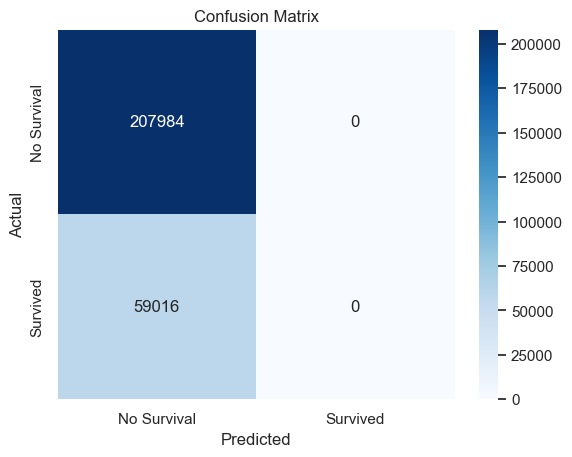

In [123]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Survival', 'Survived'], yticklabels=['No Survival', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In [75]:
# Defining X,y
X=df.drop(df[['survived']],axis=1)
y=df['survived']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,random_state=42)

# Standardize numerical features
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)



In [76]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train_scaled, y_train)


DecisionTreeClassifier(criterion='entropy')

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.644059925093633

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred)

array([[157776,  50208],
       [ 44828,  14188]], dtype=int64)

In [62]:
df["survived"].value_counts()# imbalance between the data 

survived
0    693996
1    196004
Name: count, dtype: int64

 IN  LogisticRegression accuracy was 0.77 ut after doing   DecisionTreeClassifier accuracy again decrese to 0.64
 then I have cheak Useing  'df["survived"].value_counts()' to check the balance. i notice there is no balance between
 them so now i am using 'SMOTE'

REAPPLYING AGAIN ' LogisticRegression' AND 'DecisionTreeClassifier ' WHEATER THIS INCREASE MY OUTPUT AGAIN OR NOT

In [94]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Define features (X) and target (y)
X = df.drop(columns=["survived"])  # Replace 'survived' with your actual target column
y = df["survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only to the training set
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the features (optional, but useful for models like SVM, Logistic Regression)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Create and train the model
from sklearn.linear_model import  LogisticRegression
model =  LogisticRegression()
model.fit(X_train_resampled , y_train_resampled)

# Predictions
y_pred = model.predict(X_test)


# Model evaluation
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy: {accuracy}')

print(f'confusion_matrix:{confusion_matrix(y_test, y_pred)}')

print(f'classification_report:{classification_report(y_test, y_pred)}')

Accuracy: 0.7420393258426966
confusion_matrix:[[129369   9430]
 [ 36487   2714]]
classification_report:              precision    recall  f1-score   support

           0       0.78      0.93      0.85    138799
           1       0.22      0.07      0.11     39201

    accuracy                           0.74    178000
   macro avg       0.50      0.50      0.48    178000
weighted avg       0.66      0.74      0.69    178000



In [92]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold

# Define features (X) and target (y)
X = df.drop(columns=["survived"])  # Replace 'survived' with the actual target column
y = df["survived"]


# Feature selection (removes low-variance features)
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
X_selected = selector.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree with pruning
tree = DecisionTreeClassifier(max_depth=10, min_samples_split=50, random_state=42)  # Adjust parameters to prevent overfitting
tree.fit(X_train, y_train)

# Predict on the test set
y_pred = tree.predict(X_test)

# Evaluate performance
print('(classification_report\n',classification_report(y_test, y_pred))
print('confusion_matrix \n',confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy}')


(classification_report
               precision    recall  f1-score   support

           0       0.78      1.00      0.88    138799
           1       0.25      0.00      0.00     39201

    accuracy                           0.78    178000
   macro avg       0.52      0.50      0.44    178000
weighted avg       0.66      0.78      0.68    178000

confusion_matrix 
 [[138713     86]
 [ 39172     29]]
Accuracy: 0.6153314606741573


In [73]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from collections import Counter

# Define hyperparameter grid for tuning
param_grid = {
    "max_depth": [5, 10, 15],
    "min_samples_split": [10, 20, 50],
    "min_samples_leaf": [5, 10, 20],
    "criterion": ["gini", "entropy"]
}

# Feature selection: Removing low-variance features
selector = VarianceThreshold(threshold=0.02)  # Adjust based on dataset characteristics
X_selected = selector.fit_transform(X)  # Assuming X is defined earlier

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.35, stratify=y, random_state=42
)

# Check class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE for handling class imbalance
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # up to for 0.5 
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Initialize Decision Tree model
tree = DecisionTreeClassifier(random_state=42, class_weight="balanced")

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(
    tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train_resampled, y_train_resampled)

# Output best parameters from GridSearch
print("Best hyperparameters:", grid_search.best_params_)

# Train Decision Tree model with best parameters
best_tree = grid_search.best_estimator_
best_tree.fit(X_train_resampled, y_train_resampled)

# Make predictions on test data
y_pred = best_tree.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')


Class distribution before SMOTE: Counter({0: 451097, 1: 127403})
Class distribution after SMOTE: Counter({0: 451097, 1: 225548})
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88    242899
           1       0.23      0.00      0.00     68601

    accuracy                           0.78    311500
   macro avg       0.51      0.50      0.44    311500
weighted avg       0.66      0.78      0.68    311500

Confusion Matrix:
 [[242425    474]
 [ 68459    142]]
Accuracy: 0.7787


In [64]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Define features (X) and target (y)
X = df.drop(columns=["survived"])  # Replace 'survived' with the actual target column
y = df["survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only to the training set
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the features (optional, but useful for models like SVM, Logistic Regression)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Train a model (Example: Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


              precision    recall  f1-score   support

           0       0.78      0.91      0.84    138799
           1       0.22      0.09      0.13     39201

    accuracy                           0.73    178000
   macro avg       0.50      0.50      0.48    178000
weighted avg       0.66      0.73      0.68    178000

Accuracy: 0.7315168539325843
